In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
DATA_DIR = "/scratch/gpfs/sj0161/mlphase/data/"
MODEL_PATH = "/scratch/gpfs/sj0161/mlphase/model/"
TRAIN_RESULT_DIR = "/scratch/gpfs/sj0161/mlphase/pickle/"

RESULT_DIR = "/home/sj0161/mlphase/result_pickle/"
PLOT_DIR = "/home/sj0161/mlphase/figure/"
CSV_DIR = "/home/sj0161/mlphase/result_csv/"

In [3]:
import proplot as pplt
import matplotlib.pyplot as plt
import os
import glob
import pickle
import numpy as np
import pandas as pd
from sklearn import metrics as skm


COLORS = []
colors = pplt.Cycle("ggplot")
for color in colors:
    COLORS.append(color["color"])
colors = pplt.Cycle("default")
for color in colors:
    COLORS.append(color["color"])

pplt.rc["figure.facecolor"] = "white"

In [10]:
from mlphase.analysis.load_result import load_metrics

# Load the metrics
f1, r2, mae = load_metrics(
    res_dir=RESULT_DIR,
    train_res_dir=TRAIN_RESULT_DIR,
    reload=False,
    losses=["base", "softbase", "softpir"],
)

# 10% data
print("base 10% f1: {:.4f}".format(f1[0, 2, 0]))
print("pi   10% f1: {:.4f}".format(f1[2, 2, 0]))
print("pir  10% f1: {:.4f}".format(f1[4, 2, 0]))

print()
print("base 10% r2: {:.4f}".format(r2[0, 2, 0]))
print("pi   10% r2: {:.4f}".format(r2[2, 2, 0]))
print("pir  10% r2: {:.4f}".format(r2[4, 2, 0]))

print()
print("base 10% mae: {:.4f}".format(mae[0, 2, 0]))
print("pi   10% mae: {:.4f}".format(mae[2, 2, 0]))
print("pir  10% mae: {:.4f}".format(mae[4, 2, 0]))


# 100% data
print()
print("base 100% f1: {:.4f}".format(f1[0, -1, 0]))
print("pi   100% f1: {:.4f}".format(f1[2, -1, 0]))
print("pir  100% f1: {:.4f}".format(f1[4, -1, 0]))

print()
print("base 100% r2: {:.4f}".format(r2[0, -1, 0]))
print("pi   100% r2: {:.4f}".format(r2[2, -1, 0]))
print("pir  100% r2: {:.4f}".format(r2[4, -1, 0]))

print()
print("base 100% mae: {:.4f}".format(mae[0, -1, 0]))
print("pi   100% mae: {:.4f}".format(mae[2, -1, 0]))
print("pir  100% mae: {:.4f}".format(mae[4, -1, 0]))


base 10% f1: 0.9663
pi   10% f1: 0.9670
pir  10% f1: 0.9656

base 10% r2: 0.9296
pi   10% r2: 0.9366
pir  10% r2: 0.9349

base 10% mae: 0.0222
pi   10% mae: 0.0213
pir  10% mae: 0.0226

base 100% f1: 0.9724
pi   100% f1: 0.9701
pir  100% f1: 0.9715

base 100% r2: 0.9420
pi   100% r2: 0.9451
pir  100% r2: 0.9459

base 100% mae: 0.0175
pi   100% mae: 0.0170
pir  100% mae: 0.0172


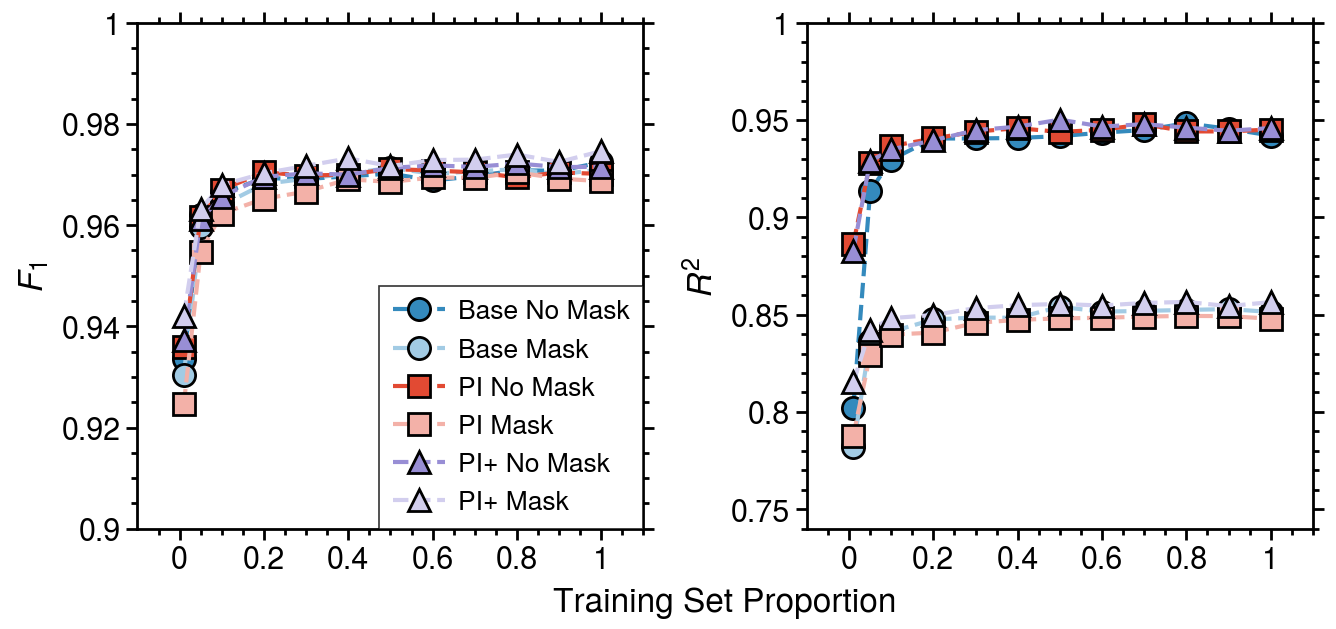

In [11]:
from mlphase.plot import plot_train_size

plot_train_size(
    plot_dir=PLOT_DIR,
    colors=COLORS,
    res_f1=f1[[0, 1, 2, 3, 4, 5], :, 0],
    res_r2=r2[[0, 1, 2, 3, 4, 5], :, 0],
    plot_std=False,
    labels=["Base No Mask", "Base Mask", "PI No Mask", "PI Mask", "PI+ No Mask", "PI+ Mask"],
    ylims=[[0.9, 1], [0.74, 1.0]],
    out_name="metric",
    single_index=None,
    fmt="pdf",
)

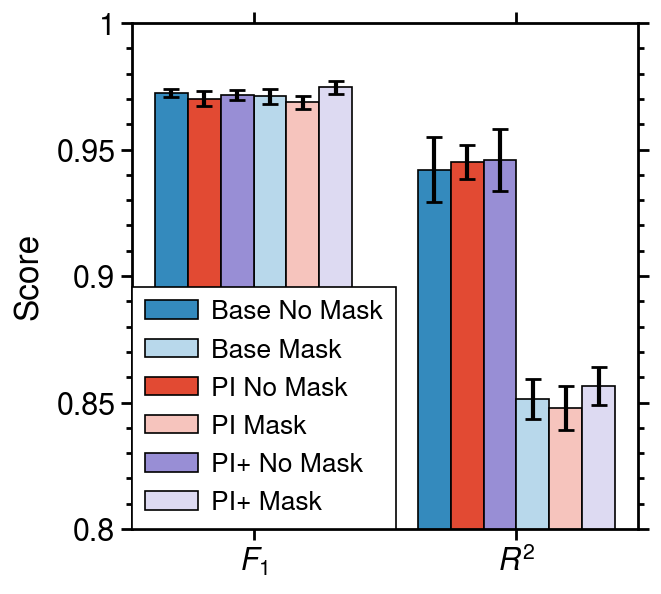

In [12]:
from mlphase.plot import plot_bar

plot_bar(
    plot_dir=PLOT_DIR,
    colors=COLORS,
    res_f1=f1[[0, 1, 2, 3, 4, 5], :],
    res_r2=r2[[0, 1, 2, 3, 4, 5], :],
    ylims=[0.8, 1.0],
    fmt="pdf",
)


base 1.0
F1: 0.9724

softbase 1.0
F1: 0.9701

softpir 1.0
F1: 0.9715

base 0.1
F1: 0.9663

softbase 0.1
F1: 0.9670

softpir 0.1
F1: 0.9656



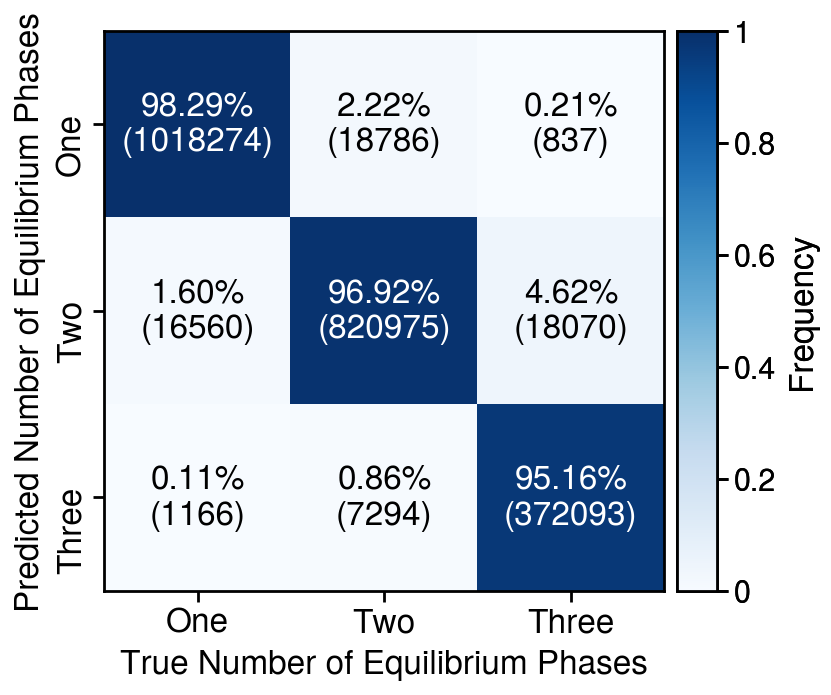

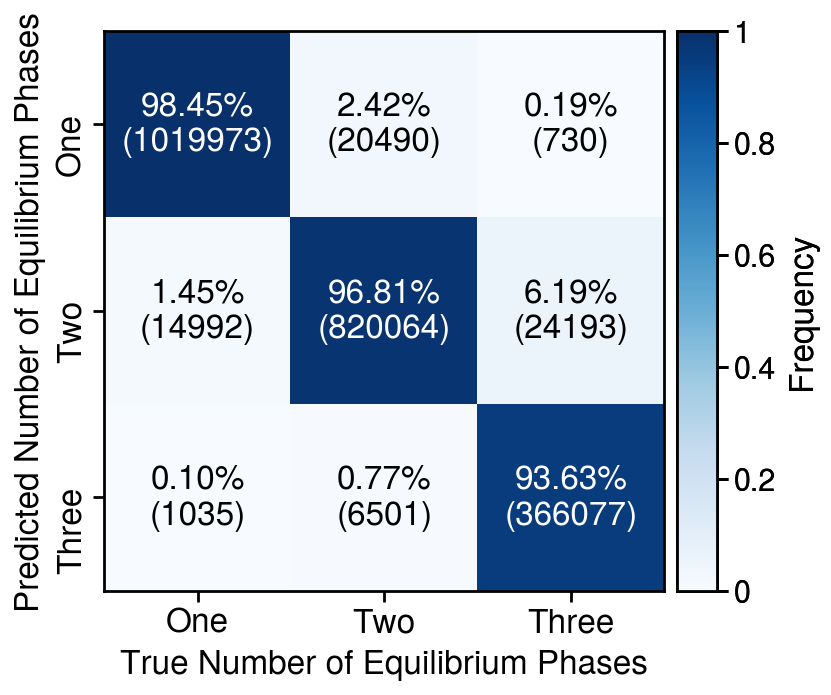

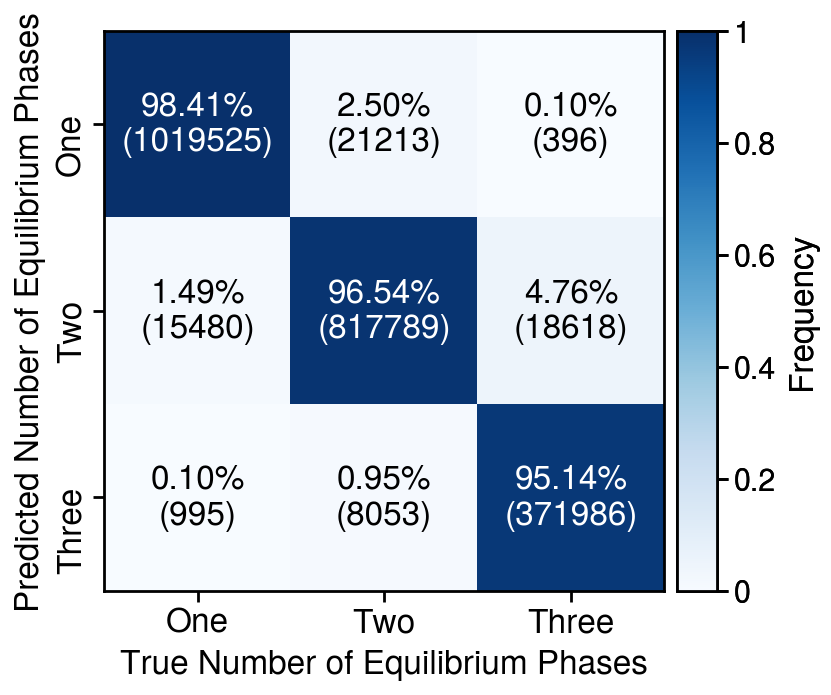

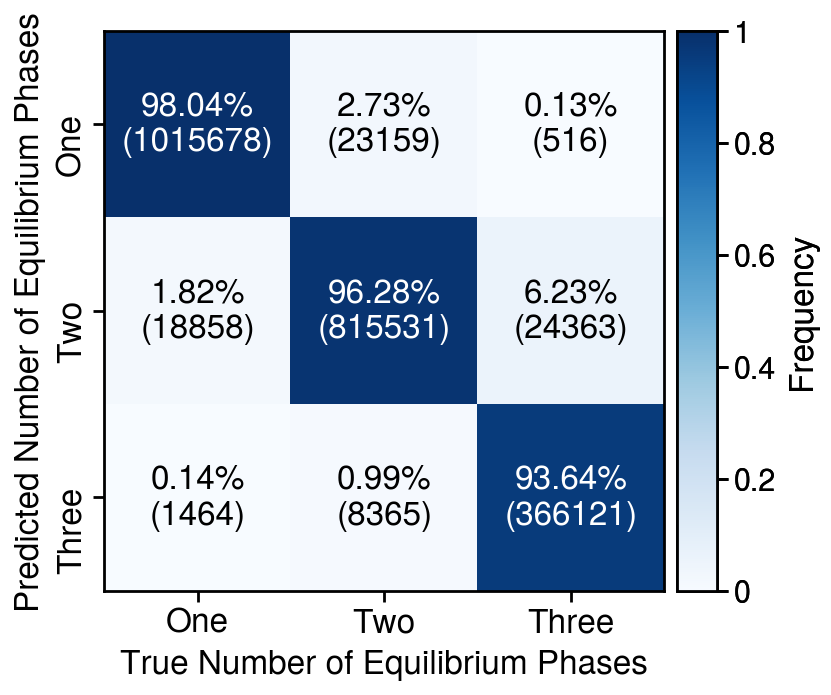

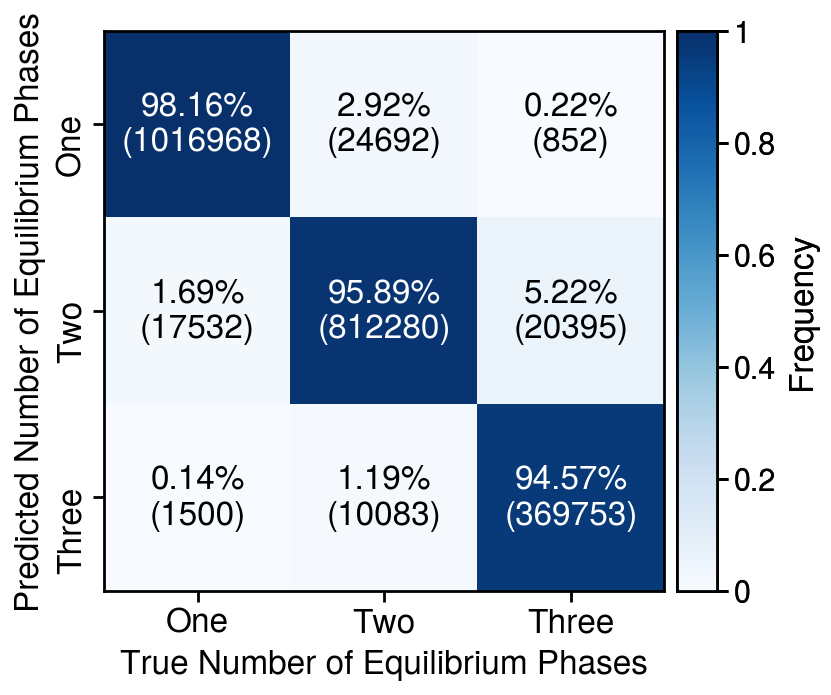

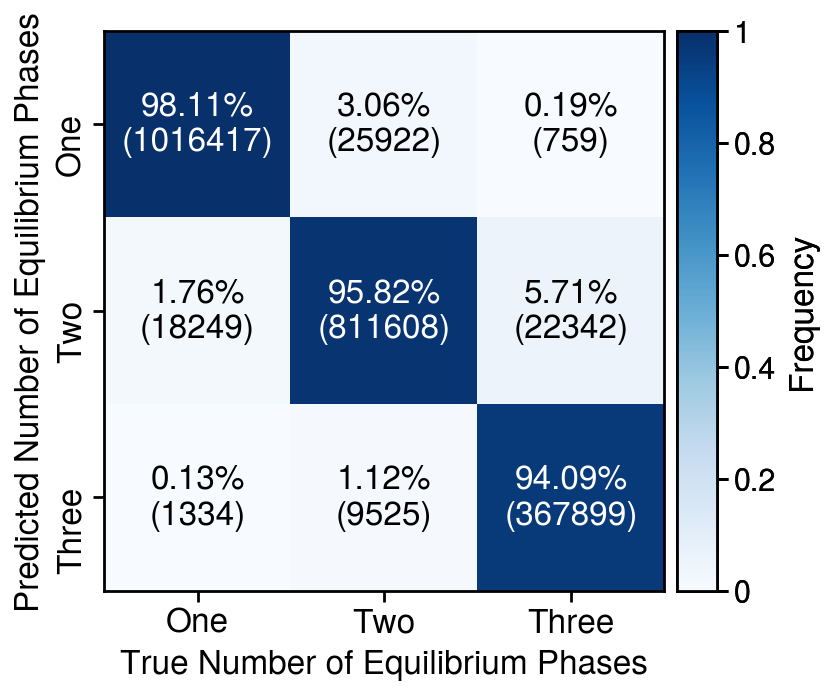

In [14]:
from mlphase.plot import gen_conf_matrix

data_sizes = ["1.0", "0.1"]
model_types = ["base", "softbase", "softpir"]
base_path = "/scratch/gpfs/sj0161/mlphase/pickle"
pattern = "MLPHASEOUTER-*-1-*-*-*-0-{data_size}-*-{model_type}.pickle"


for data_size in data_sizes:
    for model_type in model_types:
        files = os.path.join(
            base_path, pattern.format(data_size=data_size, model_type=model_type)
        )
        files = sorted(glob.glob(files))
        
        print(f"{model_type} {data_size}")
        gen_conf_matrix(PLOT_DIR=PLOT_DIR, COLORS=COLORS, files=files)

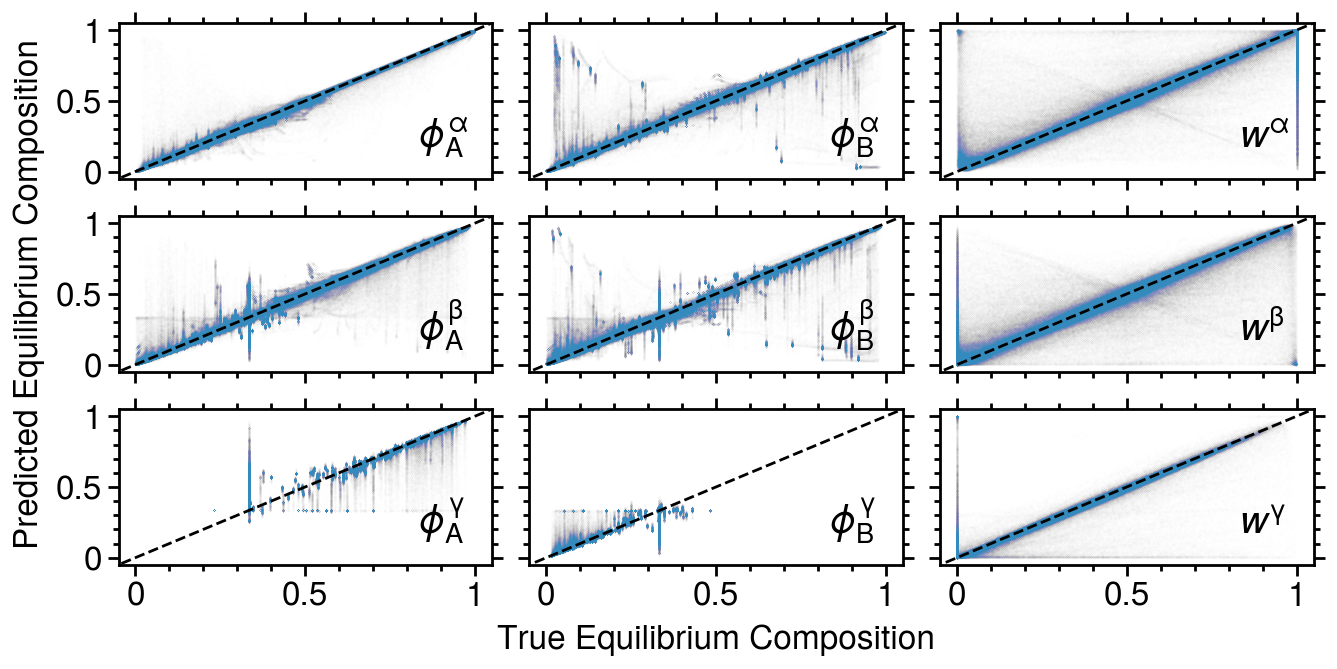

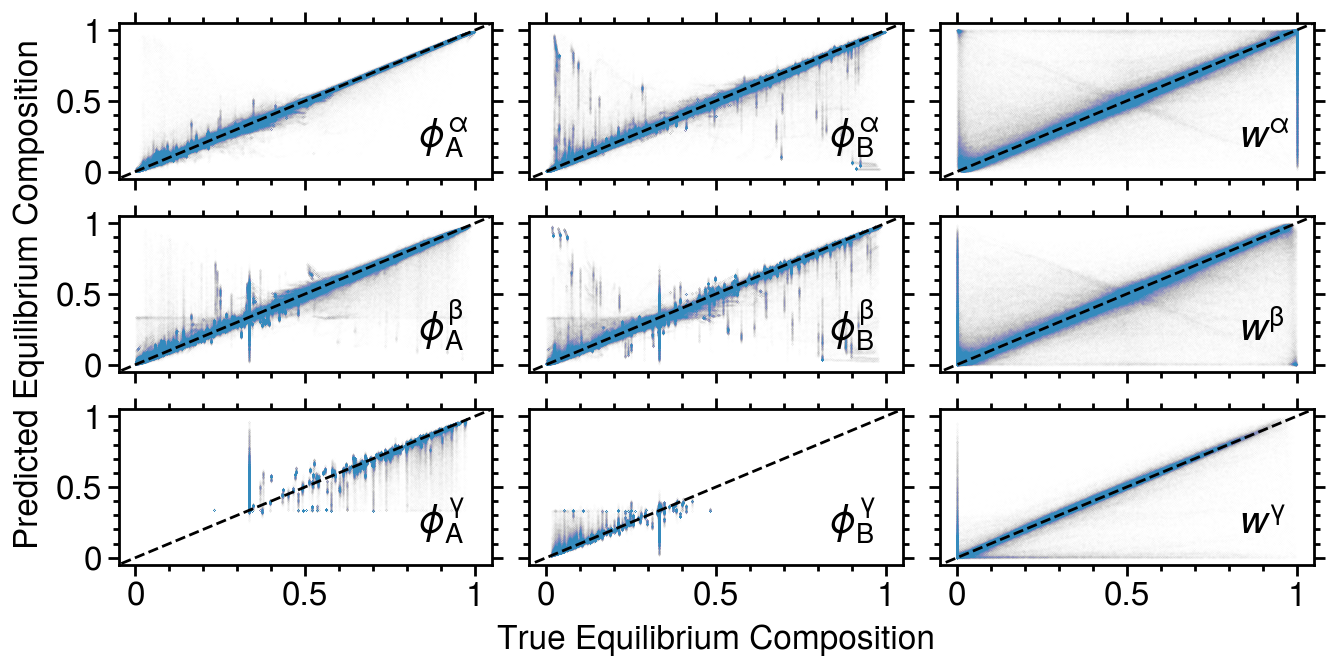

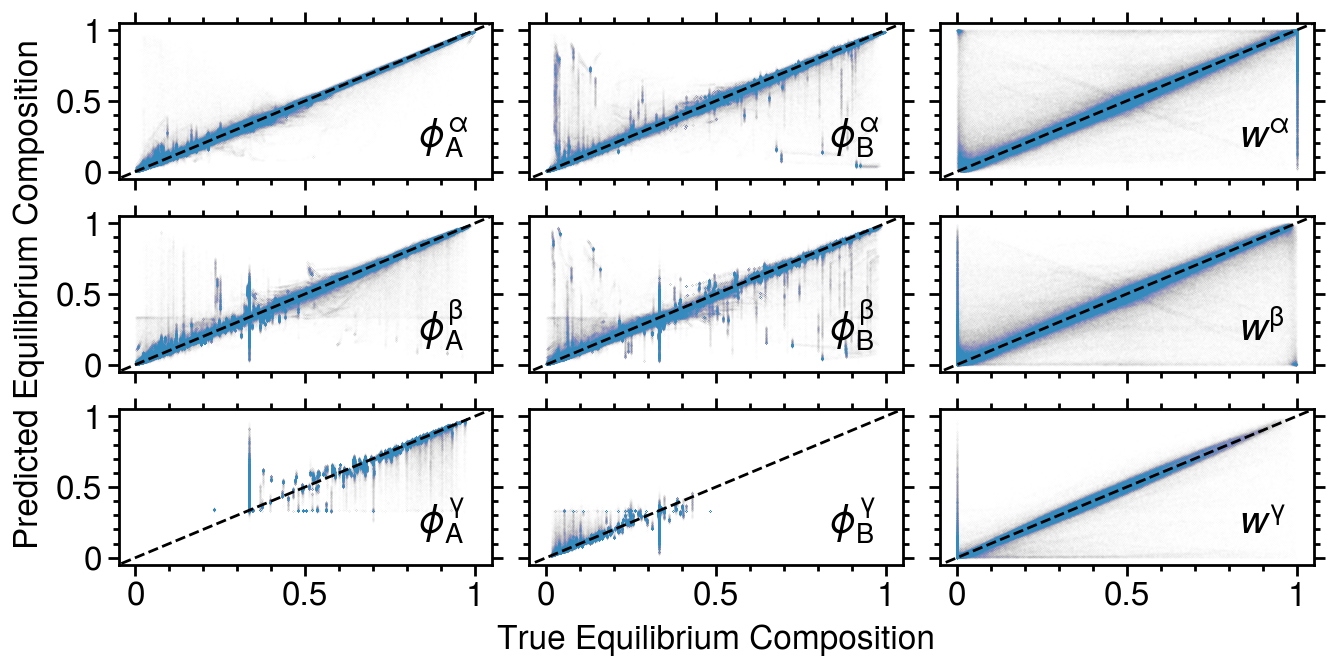

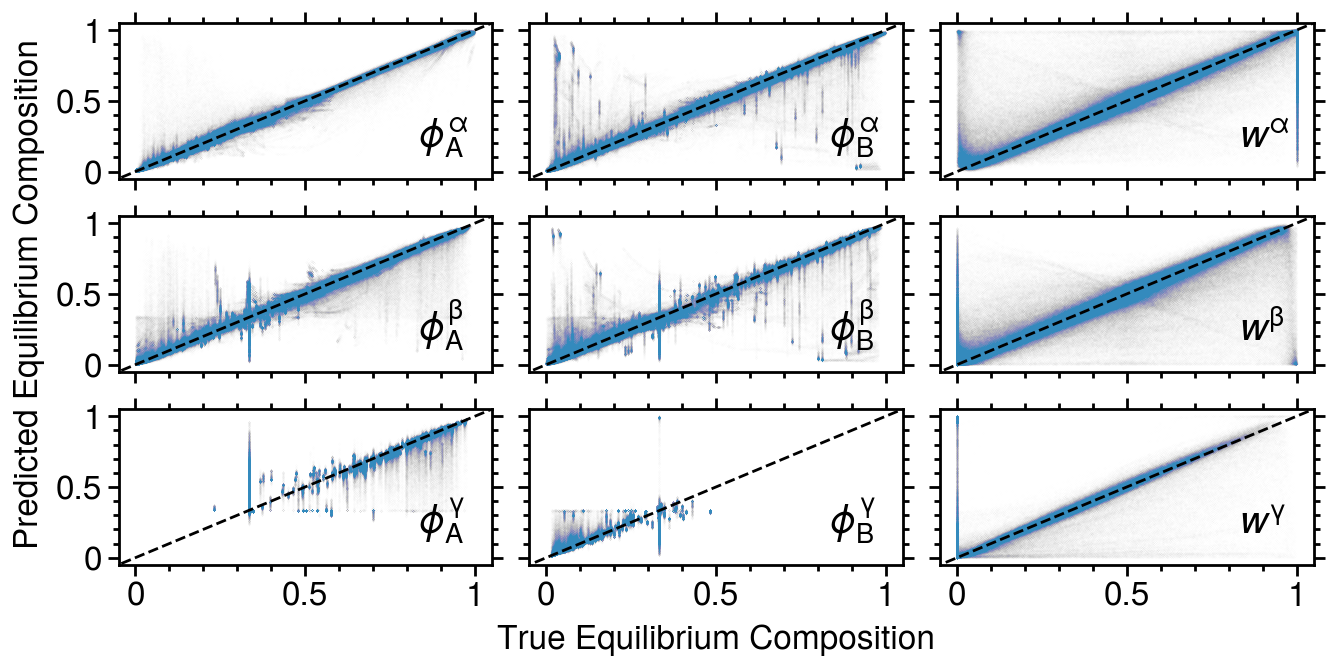

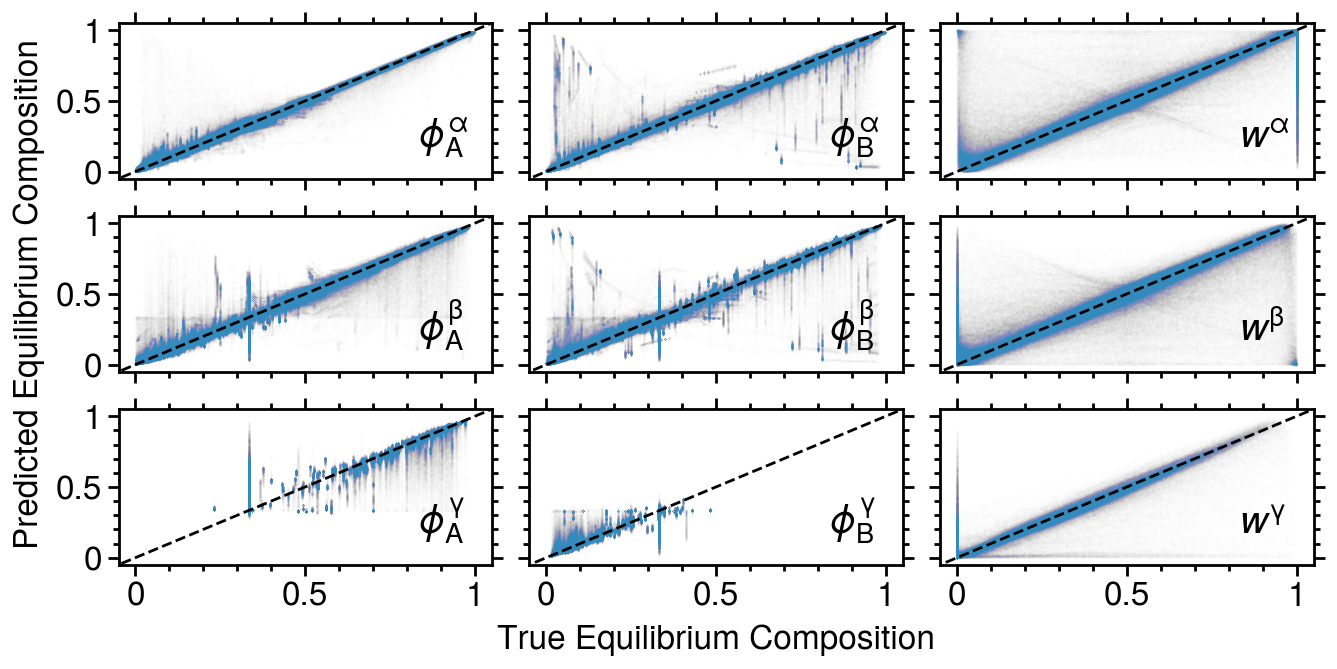

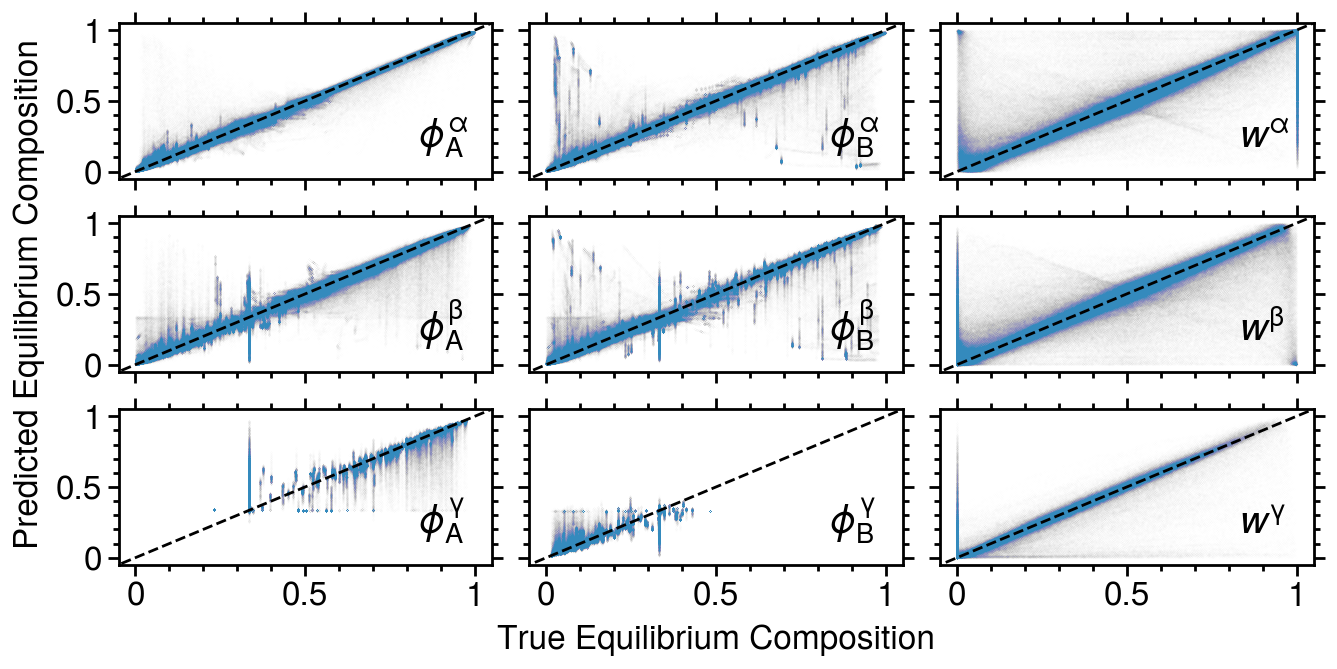

In [4]:
from mlphase.plot import gen_parity_plot

data_sizes = ["1.0", "0.1"]
model_types = ["base", "softbase", "softpir"]

for data_size in data_sizes:
    for model_type in model_types:
        gen_parity_plot(TRAIN_RESULT_DIR=TRAIN_RESULT_DIR, 
                        PLOT_DIR=PLOT_DIR, 
                        COLORS=COLORS, 
                        mask=0, 
                        loss=model_type, 
                        sample_ratio=data_size)

/home/sj0161/mlphase/fig_new/loss_delta_mu.pdf saved ...


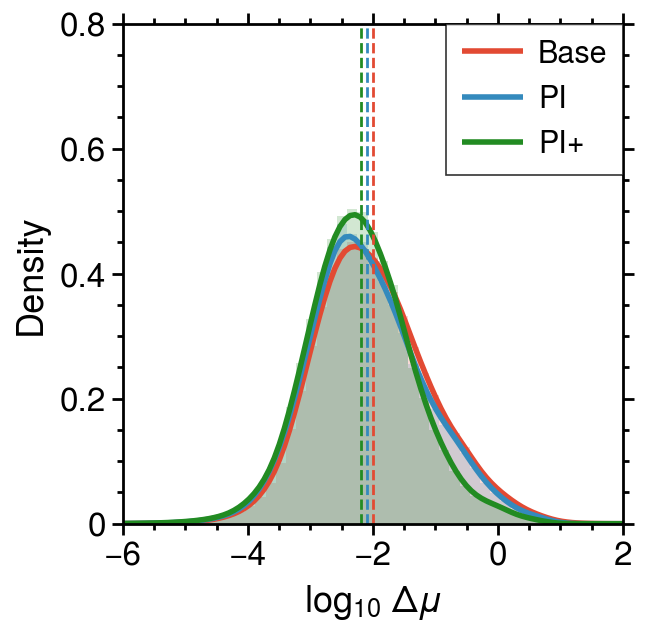

In [10]:
from mlphase.plot import gen_loss_delta_mu

gen_loss_delta_mu(
    RESULT_DIR=TRAIN_RESULT_DIR,
    PLOT_DIR=PLOT_DIR,
    COLORS=COLORS,
    which="all",
    format="pdf",
)


/home/sj0161/mlphase/fig_new/loss_split.pdf saved ...


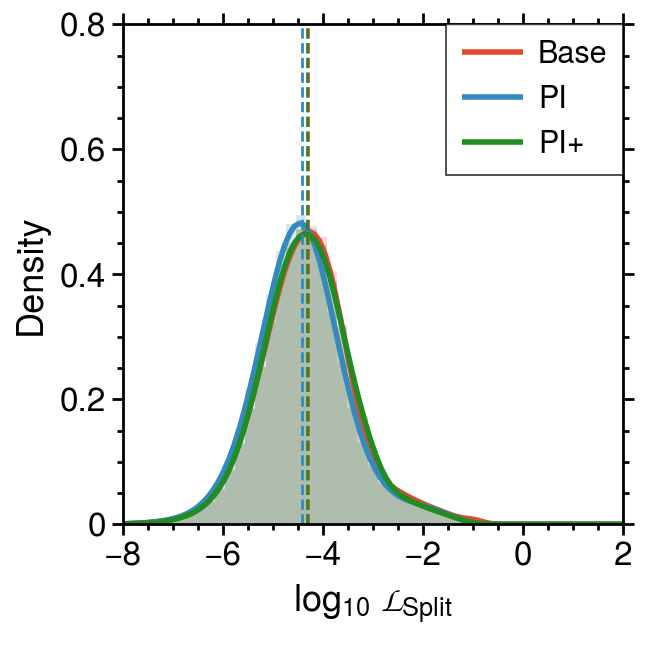

In [11]:
from mlphase.plot import gen_loss_split

gen_loss_split(
    RESULT_DIR=TRAIN_RESULT_DIR,
    PLOT_DIR=PLOT_DIR,
    COLORS=COLORS,
    format="pdf",
)

/home/sj0161/mlphase/fig_new/loss_min_f.pdf saved ...


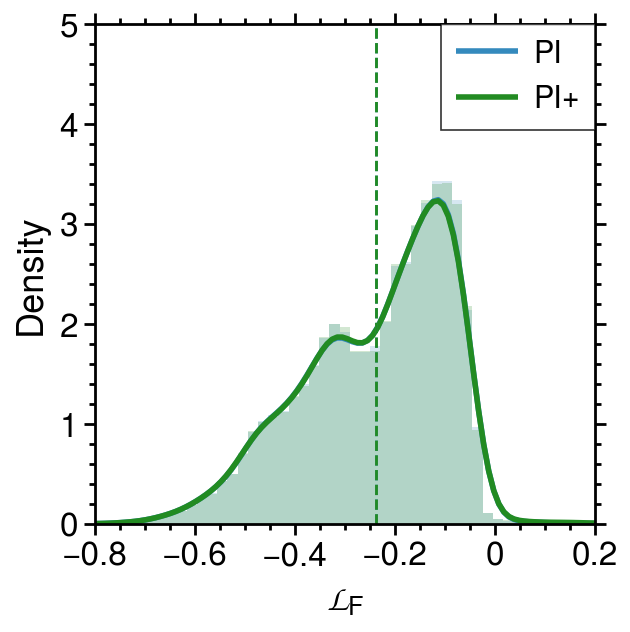

In [12]:
from mlphase.plot import gen_loss_min_f

gen_loss_min_f(
    RESULT_DIR=TRAIN_RESULT_DIR,
    PLOT_DIR=PLOT_DIR,
    COLORS=COLORS,
    format="pdf",
)

/home/sj0161/mlphase/fig_new/loss_weight.pdf saved ...


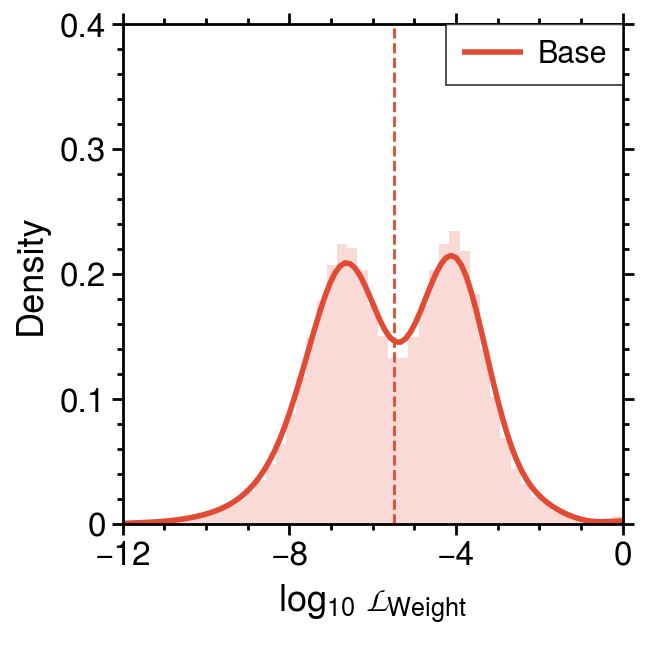

In [13]:
from mlphase.plot import gen_loss_weight

gen_loss_weight(
    RESULT_DIR=TRAIN_RESULT_DIR,
    PLOT_DIR=PLOT_DIR,
    COLORS=COLORS,
    format="pdf",
)


/home/sj0161/mlphase/fig_new/loss_unity.pdf saved ...


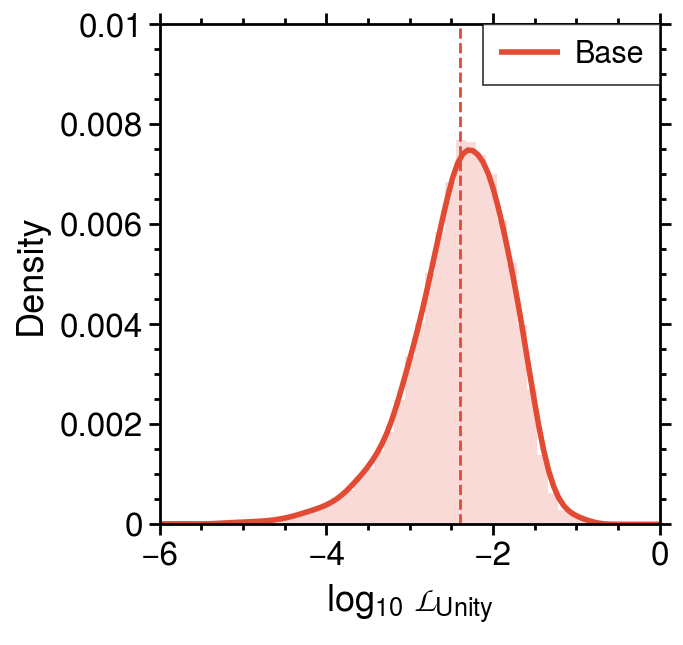

In [14]:
from mlphase.plot import gen_loss_unity

gen_loss_unity(
    RESULT_DIR=TRAIN_RESULT_DIR,
    PLOT_DIR=PLOT_DIR,
    COLORS=COLORS,
    format="pdf",
)


/home/sj0161/mlphase/fig_new/loss_mae.pdf saved ...


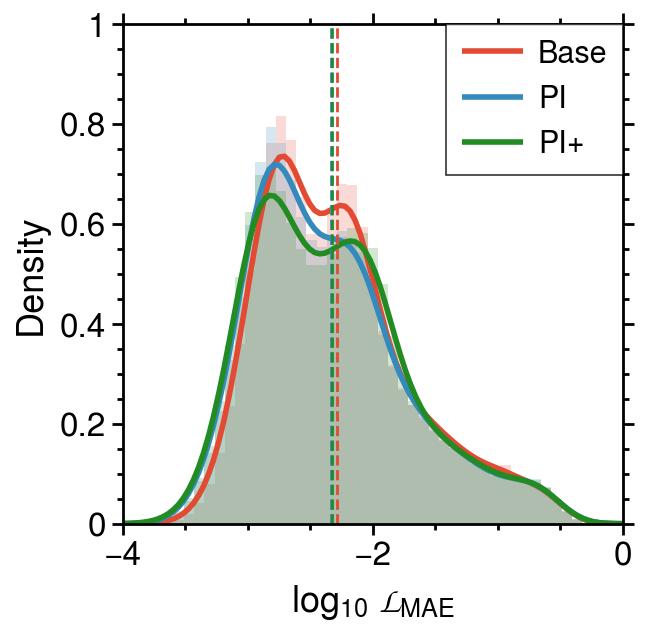

In [15]:
from mlphase.plot import gen_loss_mae

gen_loss_mae(
    RESULT_DIR=TRAIN_RESULT_DIR,
    PLOT_DIR=PLOT_DIR,
    COLORS=COLORS,
    format="pdf",
)


In [6]:
from mlphase.analysis.load_result import load_test_metrics_by_phase

In [15]:
f1, r2, mae = load_test_metrics_by_phase(
    res_dir=RESULT_DIR,
    train_res_dir=TRAIN_RESULT_DIR,
    reload=False,
    losses=["base", "softbase", "softpir"]
)

f1 = np.array(f1)[:, :, -1, :]
r2 = np.array(r2)[:, :, -1, :]
mae = np.array(mae)[:, :, -1, :]


In [8]:
models = ['Base', 'Pi', 'Pi+']
phases = ['Phase 1', 'Phase 2', 'Phase 3']

header = f"{'Model':<10} {'Phase':<10} {'MAE (Mean ± Std)'}"
print(header)
print('-' * len(header))

for i, model in enumerate(models):
    for j, phase in enumerate(phases):
        mean = mae[i, j, 0]
        std = mae[i, j, 1]
        print(f"{model:<10} {phase:<10} {mean:.4f} ({std:.4f})")
    print()

Model      Phase      MAE (Mean ± Std)
--------------------------------------
Base       Phase 1    0.0059 (0.0011)
Base       Phase 2    0.0228 (0.0027)
Base       Phase 3    0.0366 (0.0059)

Pi         Phase 1    0.0052 (0.0010)
Pi         Phase 2    0.0221 (0.0013)
Pi         Phase 3    0.0375 (0.0031)

Pi+        Phase 1    0.0051 (0.0007)
Pi+        Phase 2    0.0228 (0.0028)
Pi+        Phase 3    0.0375 (0.0081)



In [9]:
models = ['Base', 'Pi', 'Pi+']
phases = ['Phase 1', 'Phase 2', 'Phase 3']

header = f"{'Model':<10} {'Phase':<10} {'R2 (Mean ± Std)'}"
print(header)
print('-' * len(header))

for i, model in enumerate(models):
    for j, phase in enumerate(phases):
        mean = r2[i, j, 0]
        std = r2[i, j, 1]
        print(f"{model:<10} {phase:<10} {mean:.4f} ({std:.4f})")
    print()    

Model      Phase      R2 (Mean ± Std)
-------------------------------------
Base       Phase 1    0.9821 (0.0052)
Base       Phase 2    0.9118 (0.0149)
Base       Phase 3    0.8836 (0.0377)

Pi         Phase 1    0.9867 (0.0037)
Pi         Phase 2    0.9147 (0.0086)
Pi         Phase 3    0.8832 (0.0233)

Pi+        Phase 1    0.9875 (0.0029)
Pi+        Phase 2    0.9125 (0.0151)
Pi+        Phase 3    0.8889 (0.0409)



### Post-optimization performance

In [26]:
from mlphase.analysis.post_stat import (
    post_performance_load,
    dis2,
    dis3,
    min_distance,
    find_same_index,
    post_opt_mae,
    post_opt_success,
)

In [27]:
post_result_pickle = os.path.join(RESULT_DIR, "post_performance.pickle")
results = post_performance_load(post_result_pickle=post_result_pickle, rerun=False, THRESHOLD=np.inf)

post_result_pickle = os.path.join(RESULT_DIR, "post_performance_convergence.pickle")
results_conv = post_performance_load(post_result_pickle=post_result_pickle, rerun=False, THRESHOLD=1e-7)

index_2, index_3 = find_same_index(results_conv)

name = ["base (1.0)", "pi (1.0)", "pi+ (1.0)", "base (0.1)", "pi (0.1)", "pi+ (0.1)"]

print(len(index_2), len(index_3))

# post-performance result loaded
# post-performance result loaded
187 76


In [31]:
df = post_opt_mae("/home/sj0161/mlphase/result_csv/", results, results_conv, index_2, index_3, rerun=False)
pd.options.display.float_format = '{:.4f}'.format
df

name    phase ml/opt   mean  std_error
0   base (1.0)  2 phase     ml 0.0240     0.0001
1   base (1.0)  2 phase    opt 0.0088     0.0002
2   base (1.0)  3 phase     ml 0.0366     0.0003
3   base (1.0)  3 phase    opt 0.0276     0.0003
4     pi (1.0)  2 phase     ml 0.0239     0.0001
5     pi (1.0)  2 phase    opt 0.0087     0.0002
6     pi (1.0)  3 phase     ml 0.0319     0.0002
7     pi (1.0)  3 phase    opt 0.0245     0.0003
8    pi+ (1.0)  2 phase     ml 0.0294     0.0001
9    pi+ (1.0)  2 phase    opt 0.0095     0.0002
10   pi+ (1.0)  3 phase     ml 0.0426     0.0003
11   pi+ (1.0)  3 phase    opt 0.0332     0.0003
12  base (0.1)  2 phase     ml 0.0292     0.0001
13  base (0.1)  2 phase    opt 0.0096     0.0002
14  base (0.1)  3 phase     ml 0.0393     0.0002
15  base (0.1)  3 phase    opt 0.0294     0.0003
16    pi (0.1)  2 phase     ml 0.0295     0.0001
17    pi (0.1)  2 phase    opt 0.0103     0.0002
18    pi (0.1)  3 phase     ml 0.0458     0.0003
19    pi (0.1)  3 phase    opt 0.0356     0.0003
20   pi+ (0.1)  2 phase     ml 0.0236     0.0001
21   pi+ (0.1)  2 phase    opt 0.0083     0.0002
22   pi+ (0.1)  3 phase     ml 0.0398     0.0003
23   pi+ (0.1)  3 phase    opt 0.0299     0.0003

In [33]:
df = post_opt_success("/home/sj0161/mlphase/result_csv/", results_conv, index_2, index_3, rerun=False)
pd.options.display.float_format = '{:.4f}'.format

df

name  time_mean  time_se  2_phase_success_mean  2_phase_success_se  \
0  base (1.0)     0.4153   0.0237                0.9929              0.0002   
1    pi (1.0)     0.4305   0.0208                0.9901              0.0002   
2   pi+ (1.0)     0.5422   0.0278                0.9898              0.0002   
3  base (0.1)     0.5201   0.0296                0.9880              0.0003   
4    pi (0.1)     0.5374   0.0210                0.9870              0.0003   
5   pi+ (0.1)     0.4891   0.0291                0.9938              0.0002   

   3_phase_success_mean  3_phase_success_se  
0                0.9596              0.0006  
1                0.9591              0.0006  
2                0.9226              0.0008  
3                0.9351              0.0008  
4                0.9225              0.0008  
5                0.9436              0.0007